Hacemos un análisis posterior al barrido sobre los valores de B y c, para N = 50, el cuál nos generó violaciones de segmento en todos lo valores posibles, por lo que se hace un estudio de las simulaciones más estables, es decir, las que demoraron más tiempo antes de fallar y luego se harán cambios en el dt, tanto para estos valores de B y c, como para el valor obtenido inicialmente de B = 0.48 y c = 1e-3, los cuales eran estables para N = 40.

### Inicialmente se tiene B = 0.48 y c = 1e-3.

### Para c = 1e-3 y B = 7.0e-5

Se obtuvieron los siguiente logs:
- status = UNSTABLE_SEGFAULT
- tiempo = 258.49
- last_step = 2152
- exit_code = -11

Graficaremos para cada caso el último paso estable y posteriormente el último paso generado que no serán siempre los mismos. El último paso estable es el dado en el log, pero el último paso real debe mirarse en la carpeta.

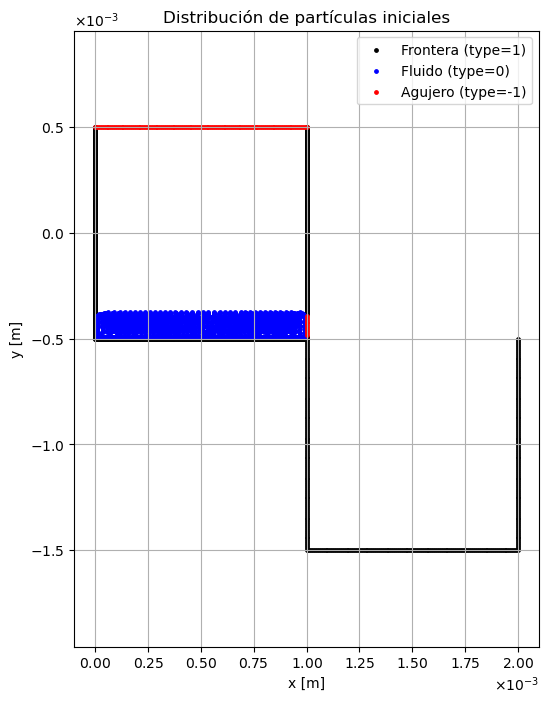

In [1]:
from utils.plot_ics import plot_ics
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

AnalysisNtree = f"{PROJECT_ROOT}/Output/EstAnalysisRhoNtree/"

# Graficamos el último paso antes del colapso
c1e_3B_7e_5_step2152 = f"{AnalysisNtree}/N_50/B_7.0e-05_c_1.0e-03/Output/state_2152.txt"

plot_ics(c1e_3B_7e_5_step2152)

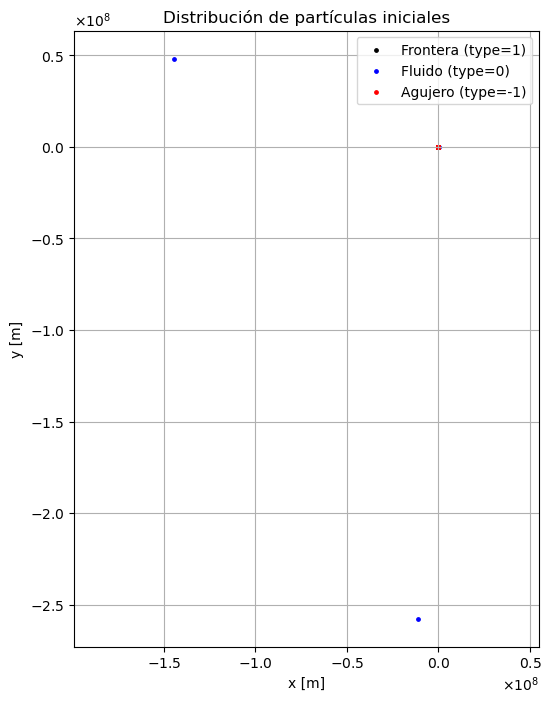

In [2]:
# Graficamos el último paso antes del colapso
c1e_3B_7e_5_step2172 = f"{AnalysisNtree}/N_50/B_7.0e-05_c_1.0e-03/Output/state_2172.txt"

plot_ics(c1e_3B_7e_5_step2172)

### Para c = 1e-5 y B = 4.0e-5

Se obtuvieron los siguiente logs:
- status = UNSTABLE_SEGFAULT
- tiempo = 418.91
- last_step = 3241
- exit_code = -11

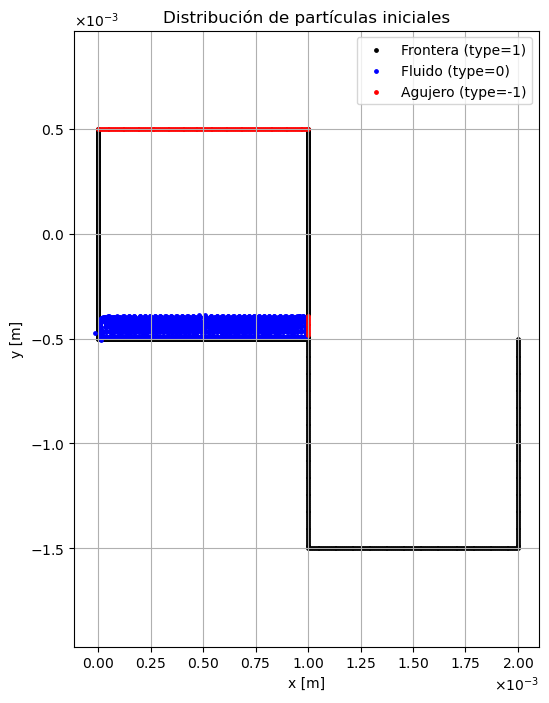

In [3]:
# Graficamos el último paso antes del colapso
c1e_5B_4e_5_step3241 = f"{AnalysisNtree}/N_50/B_4.0e-05_c_1.0e-05/Output/state_3241.txt"

plot_ics(c1e_5B_4e_5_step3241)

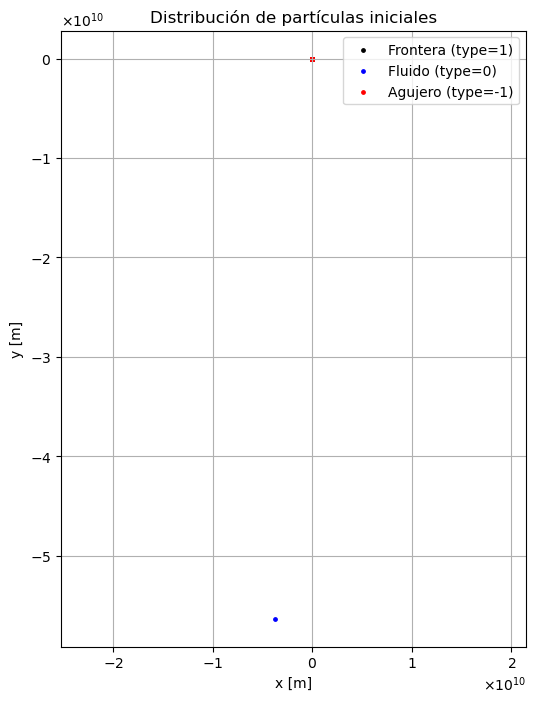

In [4]:
c1e_5B_4e_5_step3251 = f"{AnalysisNtree}/N_50/B_4.0e-05_c_1.0e-05/Output/state_3251.txt"

plot_ics(c1e_5B_4e_5_step3251)

In [5]:
BASE_PLOT = f"{AnalysisNtree}/N_50/B_4.0e-05_c_1.0e-05/Output/state_0000.txt"

from utils.create_gnuplot import generar_script_gnuplot

generar_script_gnuplot(BASE_PLOT,
                       lim=9999,
                       retardo=0.01,
                       nombre_salida="B_4.0e-05_c_1.0e-05.gp",
                       ruta_salida=Path(f"{AnalysisNtree}/N_50/B_4.0e-05_c_1.0e-05"))

✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtree/N_50/B_4.0e-05_c_1.0e-05/B_4.0e-05_c_1.0e-05.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–325 (326 partículas)
  Tipo -1: líneas 326–449 (124 partículas)
  Tipo 1: líneas 450–1108 (659 partículas)
  Tipo 0: líneas 1109–3608 (2500 partículas)


### Para c = 1e-4 y B = 4.0e-5

Se obtuvieron los siguiente logs:
- status = UNSTABLE_SEGFAULT
- tiempo = 418.91
- last_step = 2634
- exit_code = -11

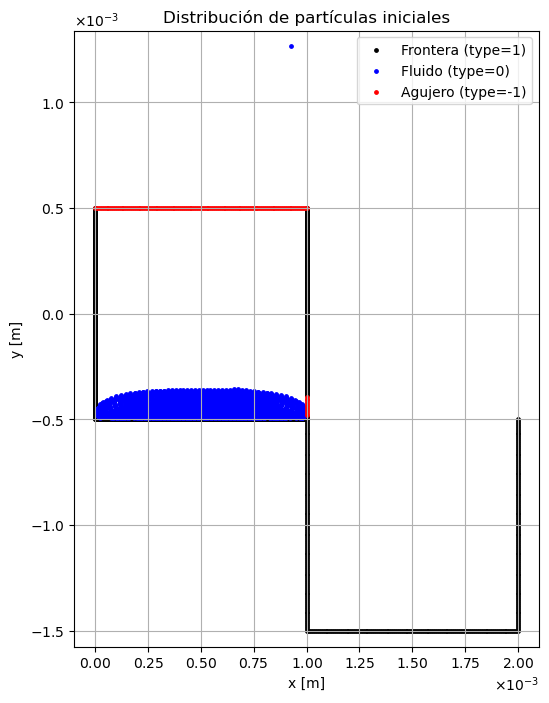

In [6]:
# Graficamos el último paso antes del colapso
c1e_4B_4e_5_step0300 = f"{AnalysisNtree}/N_50/B_4.0e-05_c_1.0e-04/Output/state_0300.txt"

plot_ics(c1e_4B_4e_5_step0300)

Una partícula se escapa desde el paso 300 y no se escapan más partículas por lo que el sistema funciona casi de manera perfecta hasta los 2634.

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


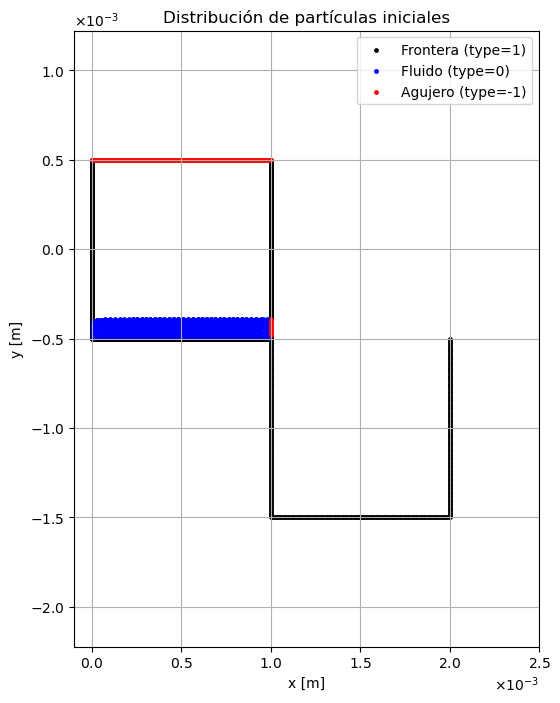

In [7]:
c1e_4B_4e_5_step2600 = f"{AnalysisNtree}/N_50/B_4.0e-05_c_1.0e-04/Output/state_2600.txt"

plot_ics(c1e_4B_4e_5_step2600, xlim=(-1e-4, 2.5e-3), ylim=(-2e-3, 1e-3))

Debido a que el comportamiento parece ser similar sin importar el valor de B,c ocurriendo una hipercompresión para todos los valores de c tanto por arriba como por debajo de c = 1e-3, es necesario hacer un estudio sobre estos mismos valores pero haciendo un cambio sobre el dt de la simulación, aunque si seguimos el análisis anterior para N = 40x40, pareciera más un valor de c muy bajo o un valor de B muy alto.

Un resumen de los valores de B,c incluyendo los dos que no se grafican y que corresponden a la simulación más estable por cada c son:

1. B = 7.0e-05, c = 1e-3,
   error type: UNSTABLE_SEGFAULT,
   time: 258.49,
   last_step:2152,
   exit_code: -11

2. B = 1.0e-4, c = 1e-5,
    UNSTABLE_SEGFAULT,248.098,
    2194,
    -11

3. B = 4e-05, c = 1e-4,
    UNSTABLE_SEGFAULT,
    333.85,
    2634,
    -11

4. B = 7.0e-05, c = 1e-2,
    UNSTABLE_SEGFAULT,
    147.26,
    1167,
    -11

5. B = 1, c = 0.1,
    UNSTABLE_SEGFAULT,
    13.826,
    220,
    -11

Parece que solo los valores de c menores a 1e-3 parecen ser suficiente estables por lo que nos quedaremos con estos valores de c y se harán cambios en los valores del dt de 1e-5 hacia abajo.

# Gráficas con dt = 5e-6

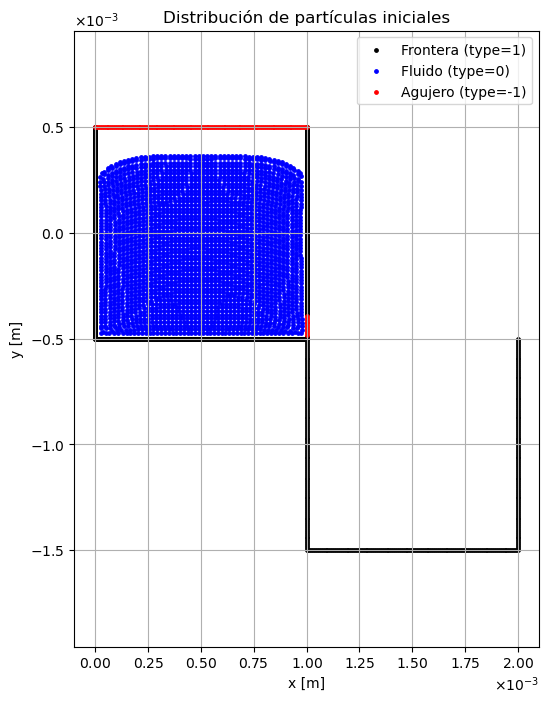

In [8]:
AnalysisNtreeDt5e_6 = f"{PROJECT_ROOT}/Output/EstAnalysisRhoNtreeDt5e-6x15sim/"

plot15e_6 = f"{AnalysisNtreeDt5e_6}/N_50/B_1.0e+01_c_1.0e-03/Output/state_2600.txt"

plot_ics(plot15e_6)

In [9]:
BASE_PLOT = f"{AnalysisNtreeDt5e_6}/N_50/B_1.0e+01_c_1.0e-03/Output/state_0000.txt"

from utils.create_gnuplot import generar_script_gnuplot

generar_script_gnuplot(BASE_PLOT,
                       lim=9999,
                       retardo=0.01,
                       nombre_salida="plot1_5e-6.gp",
                       ruta_salida=Path(f"{AnalysisNtreeDt5e_6}/N_50/B_1.0e+01_c_1.0e-03"))

✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtreeDt5e-6x15sim/N_50/B_1.0e+01_c_1.0e-03/plot1_5e-6.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–325 (326 partículas)
  Tipo -1: líneas 326–449 (124 partículas)
  Tipo 1: líneas 450–1108 (659 partículas)
  Tipo 0: líneas 1109–3608 (2500 partículas)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import re

# =================== CONFIGURACIÓN =================== #
BASE_DIR = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtreeDt5e-6x15sim/N_50")
results_csv = BASE_DIR / "results_density_vs_B.csv"
# ===================================================== #

rows = []

# Buscar carpetas tipo: B_1.0e+01_c_1.0e-03  etc.
experiment_dirs = sorted([p for p in BASE_DIR.iterdir() if p.is_dir() and p.name.startswith("B_")])

regex = r"B_([0-9eE\+\-\.]+)_c_([0-9eE\+\-\.]+)"

for exp_dir in experiment_dirs:

    # ================== Extraer B y c del nombre de la carpeta ================== #
    match = re.search(regex, exp_dir.name)
    if not match:
        print(f"⚠️ No coincide con patrón B_xxx_c_xxx: {exp_dir.name}")
        continue

    B_value = float(match.group(1))
    c_value = float(match.group(2))

    # ================== Localizar archivos de simulación ======================== #
    sim_output_dir = exp_dir / "Output"
    state_files = sorted(glob.glob(str(sim_output_dir / "state_*.txt")))

    if len(state_files) == 0:
        print(f"⚠️ No se encontraron archivos de estado en {sim_output_dir}")
        continue

    rho_means = []
    for sf in state_files:
        try:
            df = pd.read_csv(sf, sep=r"\s+", header=0)
            if "rho" not in df.columns:
                continue
            rho_means.append(df["rho"].mean())
        except Exception as e:
            print(f"Error leyendo {sf}: {e}")

    if len(rho_means) == 0:
        print(f"⚠️ No se pudo calcular densidad para B={B_value:.6e}")
        continue

    rho_global_mean = np.mean(rho_means)

    rows.append({
        "B": B_value,
        "c": c_value,
        "rho_mean": rho_global_mean
    })

# Crear DataFrame con resultados
df_results = pd.DataFrame(rows).sort_values("B")
df_results.to_csv(results_csv, index=False)

print(f"\n✅ Resultados guardados en: {results_csv}")


✅ Resultados guardados en: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtreeDt5e-6x15sim/N_50/results_density_vs_B.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta al CSV generado previamente
BASE_DIR = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtreeDt5e-6x15sim/N_50")
results_csv = BASE_DIR / "results_density_vs_B.csv"

# Cargar tabla
df = pd.read_csv(results_csv)

# Crear carpeta de plots
plots_dir = BASE_DIR / "plots_rho_vs_B"
plots_dir.mkdir(exist_ok=True)

# Graficar para cada valor de c
for c_val in sorted(df["c"].unique()):
    df_c = df[df["c"] == c_val].sort_values("B")

    plt.figure()
    plt.plot(df_c["B"], df_c["rho_mean"], marker="o")
    plt.xlabel("B")
    plt.ylabel("ρ media")
    plt.title(f"ρ media vs B para c = {c_val:.2e}")
    plt.grid(True)

    # Guardar gráfico
    out_path = plots_dir / f"rho_vs_B_c_{c_val:.2e}.png"
    plt.savefig(out_path, dpi=150)
    plt.close()

    print(f"📈 Gráfico generado: {out_path}")


📈 Gráfico generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtreeDt5e-6x15sim/N_50/plots_rho_vs_B/rho_vs_B_c_1.00e-05.png
📈 Gráfico generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtreeDt5e-6x15sim/N_50/plots_rho_vs_B/rho_vs_B_c_1.00e-04.png
📈 Gráfico generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/EstAnalysisRhoNtreeDt5e-6x15sim/N_50/plots_rho_vs_B/rho_vs_B_c_1.00e-03.png
